# Difference Equations
Note: running Python 3.6.6

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import lfilter
from scipy.signal import unit_impulse

## Viewing impulse response of simple LCCDE

$y[n] = 5x[n] + 3x[n-1] - 2x[n-3]$

Find $h[n]$, the impulse response of this difference equation.

### Method 1: Use the unit_impulse function to substitute $\delta[n]$ for $x[n]$


<StemContainer object of 3 artists>

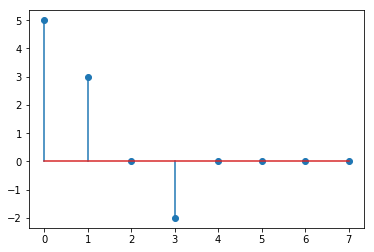

In [2]:
N = 8
n = np.arange(N)

x1 = unit_impulse(N,0)
x2 = unit_impulse(N,1)
x3 = unit_impulse(N,3)

h = 5 * x1 + 3 * x2 - 2 * x3
plt.stem(n,h)


### Method 2: Using the Scipy.signal function 'lfilter'

C:\Users\laian\Anaconda\envs\py37\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


<StemContainer object of 3 artists>

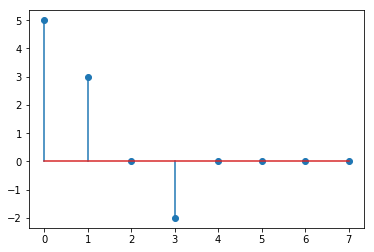

In [3]:
b = np.array([5,3,0,-2]) # Coefficients of x - leave a space for x[n-2]!
a = np.array(1) # Coefficients of y

x = unit_impulse(N,0)
h = lfilter(b,a,x)
plt.stem(n,h)

## Recursive LCCDE with 0 initial conditions
$y[n] = 0.3y[n-1] - 0.4y[n-3] + 5x[n] - 3x[n-1]$

### Method 1: Use the unit_impulse function to substitute $\delta[n]$ for $x[n]$


In [4]:
# Gets complicated and is not recommended!

<StemContainer object of 3 artists>

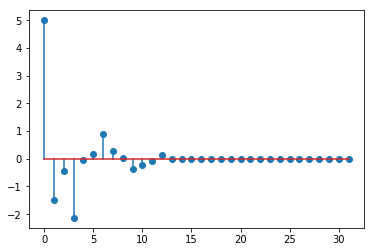

In [5]:
N = 32+3
n = np.arange(N)-3 # to have some space for initial conditions

y = np.zeros((N))
x = scipy.signal.unit_impulse(N,3) # to account for the offset in y

for i in range(3,16,1):
    y[i] = .3 * y[i-1] - .4 * y[i-3] + 5 * x[i] - 3 * x[i-1]
    
plt.stem(n[3:],y[3:])

### Method 2: Using 'lfilter' (recommended!!)

<StemContainer object of 3 artists>

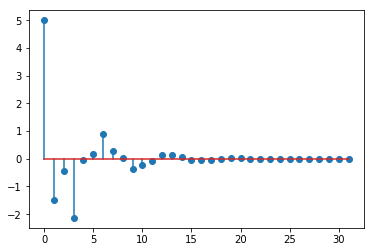

In [6]:
b = np.array([5, -3]) # coefficients of x
a = np.array([1, -0.3, 0, 0.4]) # coefficients of y - check your signs!

N = 32
n = np.arange(N)
x = unit_impulse(N,0)
h = lfilter(b,a,x)
plt.stem(n,h)

## Recursive LCCDE with non-zero initial conditions
$y[n] = 0.3y[n-1] - 0.4y[n-3] + 5x[n] - 3x[n-1]$

$y[-3] = 10$

$y[-2] = 15$

$y[-1] = 5$

### Method 1:

<StemContainer object of 3 artists>

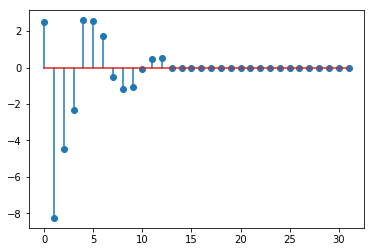

In [7]:
N = 32+3
n = np.arange(N)-3 # to have some space for initial conditions

# Set up initial conditions
y = np.zeros((N))
y[0] = 10
y[1] = 15
y[2] = 5
x = scipy.signal.unit_impulse(N,3) # to account for the offset in y

for i in range(3,16,1):
    y[i] = .3 * y[i-1] - .4 * y[i-3] + 5 * x[i] - 3 * x[i-1]
    
plt.stem(n[3:],y[3:])

### Method 2

<StemContainer object of 3 artists>

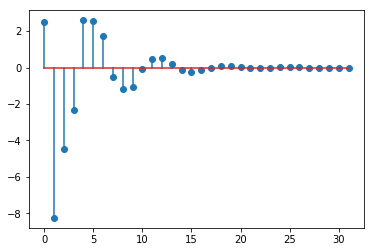

In [8]:
b = np.array([5, -3]) # coefficients of x
a = np.array([1, -0.3, 0, 0.4]) # coefficients of y - check your signs!

# Set up initial conditions
zi = scipy.signal.lfiltic(b,a,[5,15,10])

N = 32
n = np.arange(N)
x = unit_impulse(N,0)
h,zf = lfilter(b,a,x,zi=zi)
plt.stem(n,h)